# Support Vector Machine

In [1]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

# # Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# # filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [3]:
from sklearn.svm import SVC

classifier= SVC(C=1, kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [4]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.823
Test set score:0.900


In [5]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_F','MODEL_P'], index = ['DATA_F','DATA_P'])
df_confusion

,MODEL_F,MODEL_P
DATA_F,66,2
DATA_P,8,24


In [6]:
# sns.set
# fig, ax = plt.subplots(figsize=(15,6))
# ax=sns.heatmap(df_confusion, vmin=0, vmax=70, cmap="YlGnBu", annot=True)
# plt.yticks(rotation=0, fontsize="10", va="top")
# # plt.yticks(np.arange(2)+0.5,('DATA_P','DATA_F'), rotation=0, fontsize="10", va="left")

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


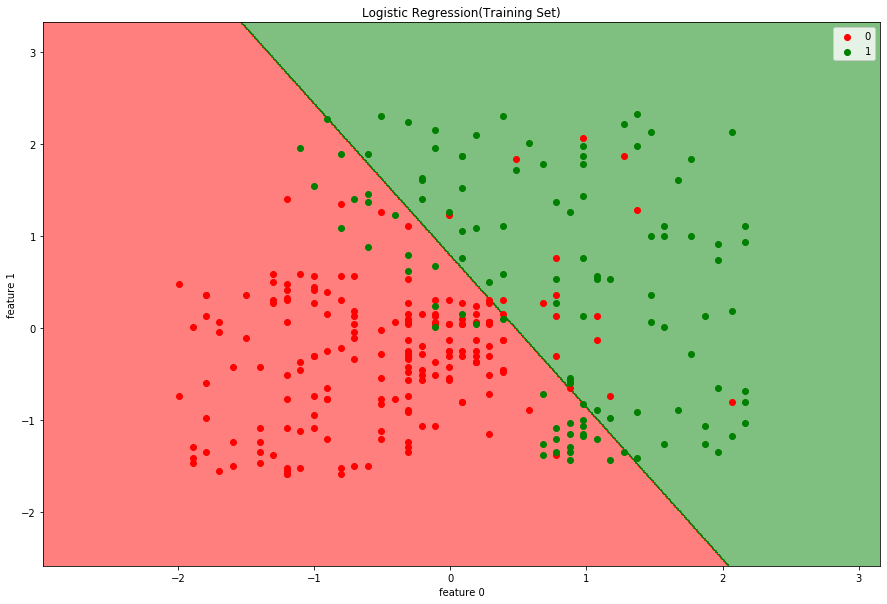

In [7]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


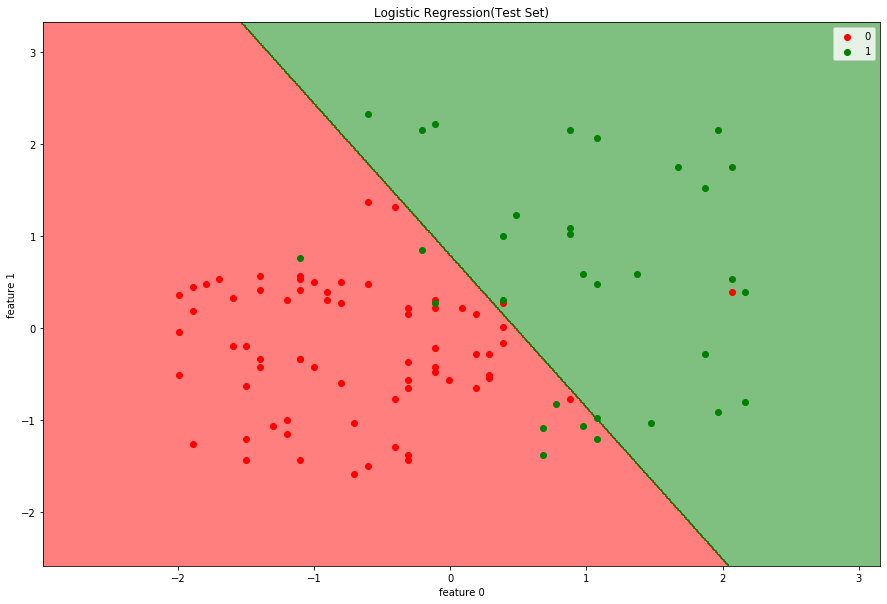

In [8]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

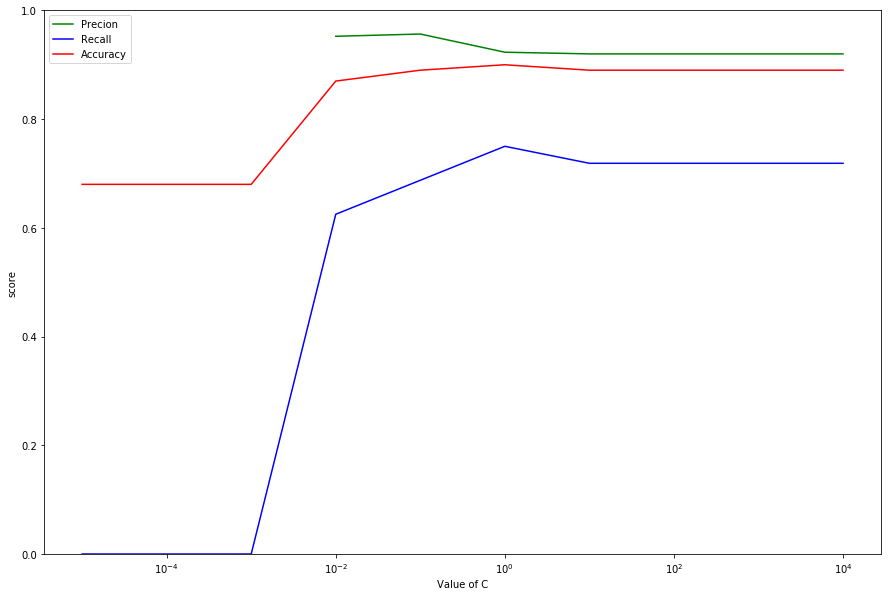

In [9]:
import warnings
warnings.filterwarnings("ignore")

figure=plt.figure(figsize=(15,10))

C_val =[0.00001*10**i for i in range(10)]
prec=[]
rca=[]
acc=[]

for C_n in C_val:
    classifier= SVC(C=C_n, kernel='linear')
    classifier.fit(X_train, y_train)
    y_pred= y_pred = classifier.predict(X_test)
    cm_=confusion_matrix(y_test, y_pred)
    pr_= cm_[1,1]/(cm_[1,1]+cm_[0,1])
    rc_= cm_[1,1]/(cm_[1,1]+cm_[1,0])
    ac_= (cm_[0,0]+cm_[1,1])/cm_.sum()
    prec.append(pr_)
    rca.append(rc_)
    acc.append(ac_)

    
plt.plot(C_val,prec,'green')
plt.plot(C_val,rca,'blue')
plt.plot(C_val,acc,'red')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylim(bottom=0, top=1)
plt.ylabel('score')
plt.legend(['Precion','Recall','Accuracy'])

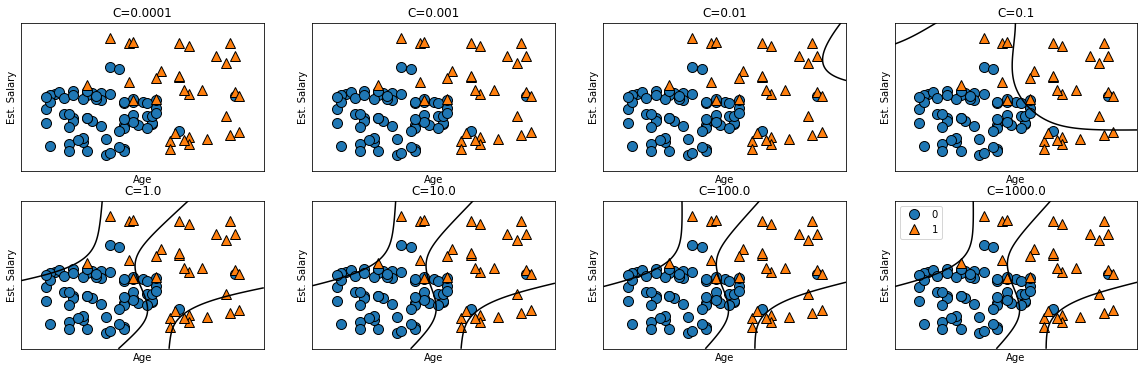

In [11]:
import mglearn

fig, axes= plt.subplots(2,4,figsize=(20,6))

for C_v,ax in zip([0.0001*10**i for i in range(8)],axes.ravel()):
    classifier= SVC(C=C_v, kernel='linear').fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
#     X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
#                      np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
#     plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, axis=ax,
#                                                                                     cmap= ListedColormap(('red','green')))

    mglearn.plots.plot_2d_separator(classifier, X_test, fill=False, ax=ax)
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test, ax=ax)
    
    ax.set_title('C={}'.format(C_v))
    ax.set_xlabel('Age')
    ax.set_ylabel('Est. Salary')

plt.legend(loc='best')
    
    

# Kernel Support Vector Machine (SVM)

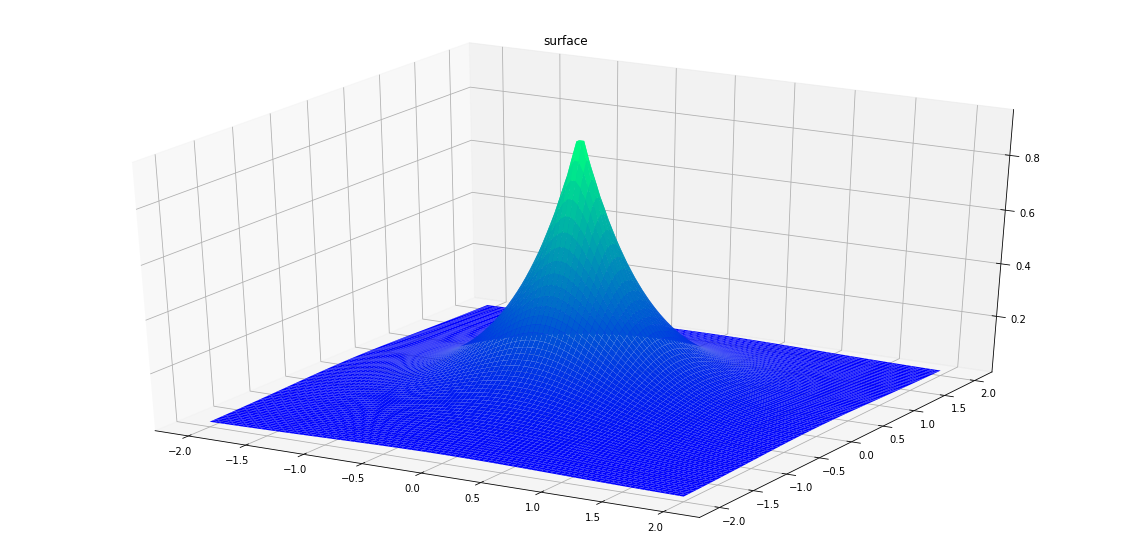

In [12]:
# RBF Kernel

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")
def z_function(x, y):
    sig=0.5
    px=0
    py=0
    return np.exp(-(np.sqrt((x-px)**2 + (y-py)**2)/(2*sig**2)))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('surface');

In [55]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

# # Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# # filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [65]:
classifier= SVC(C=1, kernel='poly', degree=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [62]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.780
Test set score:0.770
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        68
           1       0.80      0.38      0.51        32

    accuracy                           0.77       100
   macro avg       0.78      0.67      0.68       100
weighted avg       0.78      0.77      0.74       100



In [63]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_F','MODEL_P'], index = ['DATA_F','DATA_P'])
df_confusion

,MODEL_F,MODEL_P
DATA_F,65,3
DATA_P,20,12


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


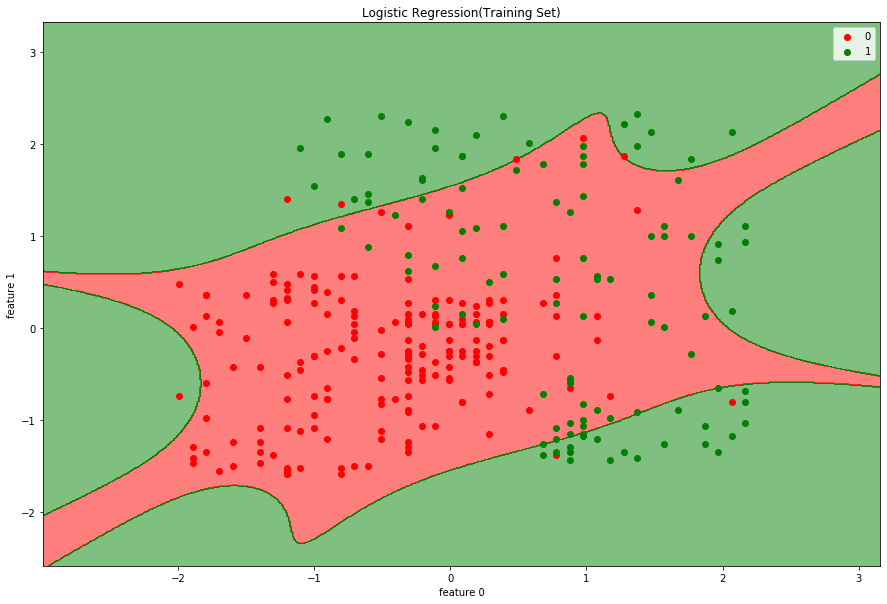

In [64]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


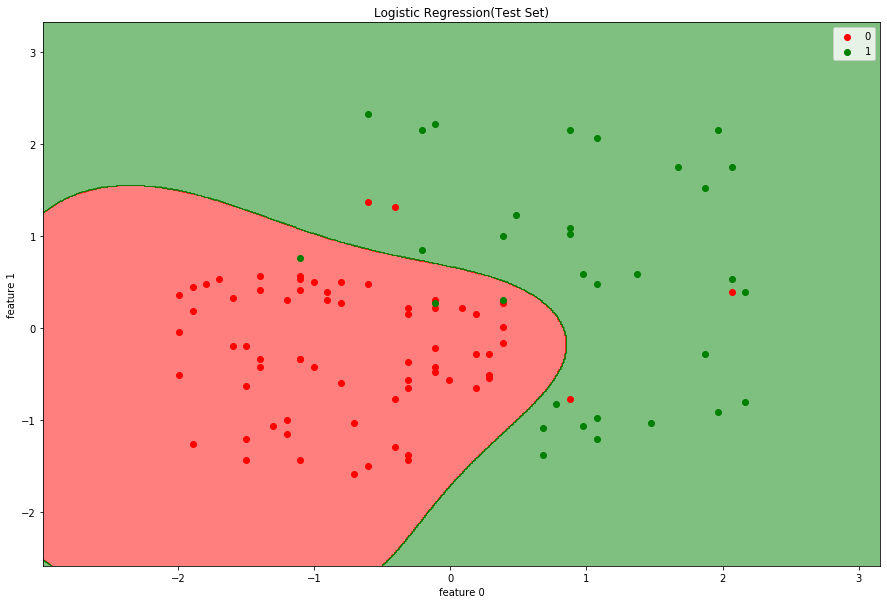

In [60]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

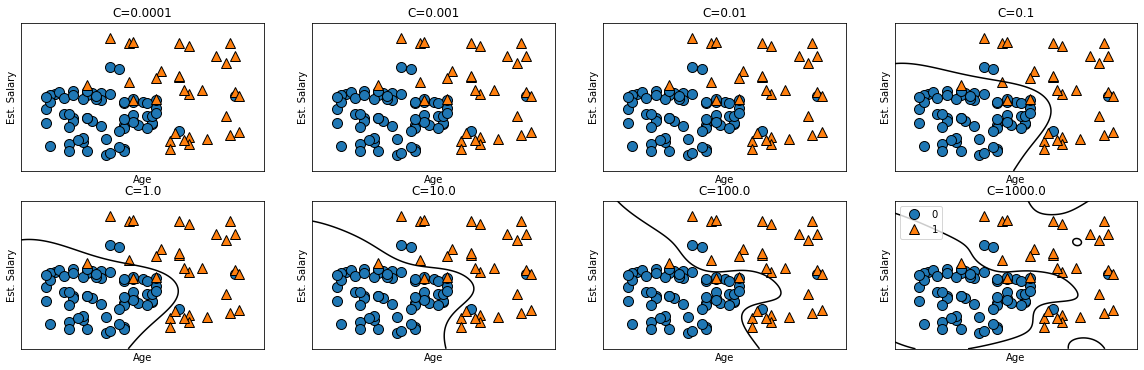

In [19]:
import mglearn

fig, axes= plt.subplots(2,4,figsize=(20,6))

for C_v,ax in zip([0.0001*10**i for i in range(8)],axes.ravel()):
    classifier= SVC(C=C_v, kernel='rbf').fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
#     X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
#                      np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
#     plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, axis=ax,
#                                                                                     cmap= ListedColormap(('red','green')))

    mglearn.plots.plot_2d_separator(classifier, X_test, fill=False, ax=ax)
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test, ax=ax)
    
    ax.set_title('C={}'.format(C_v))
    ax.set_xlabel('Age')
    ax.set_ylabel('Est. Salary')

plt.legend(loc='best')

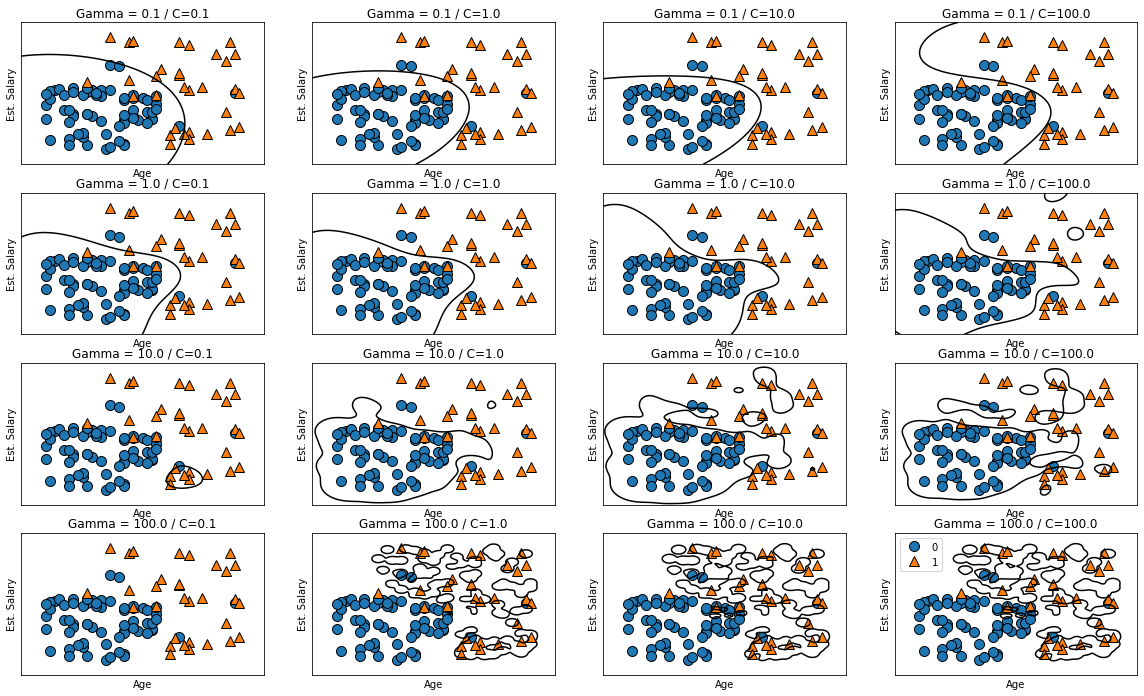

In [43]:
import mglearn

fig, axes= plt.subplots(4,4,figsize=(20,12))

for gamma_v, ax in zip([0.1*10**i for i in range(4)], axes):
    for C_v,ax_ in zip([0.1*10**i for i in range(4)], ax):
    
        classifier= SVC(C=C_v, gamma = gamma_v, kernel='rbf').fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    #     X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
    #                      np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
    #     plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, axis=ax,
    #                                                                                     cmap= ListedColormap(('red','green')))

        mglearn.plots.plot_2d_separator(classifier, X_test, fill=False, ax=ax_)
        mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test, ax=ax_)

        ax_.set_title('Gamma = {} / C={}'.format(gamma_v, C_v))
        ax_.set_xlabel('Age')
        ax_.set_ylabel('Est. Salary')

plt.legend(loc='best')

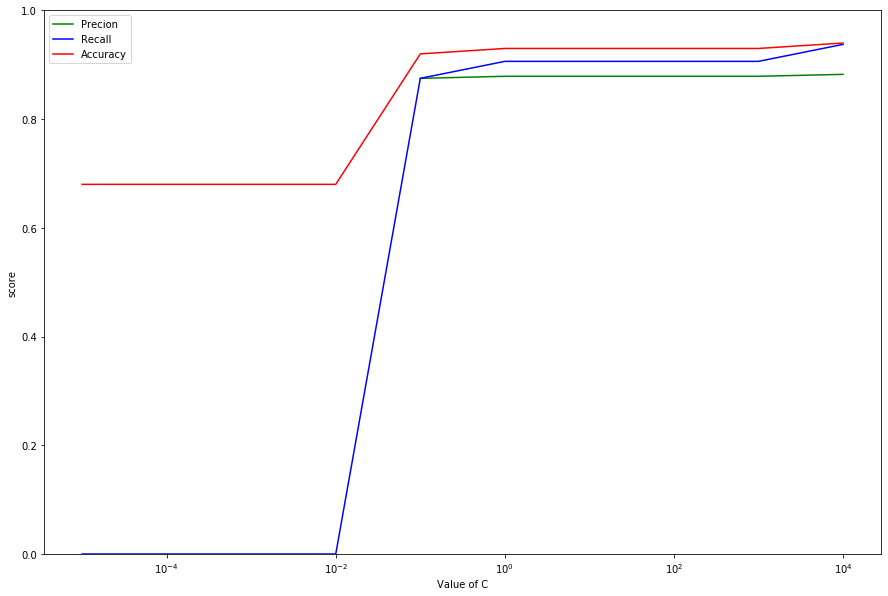

In [45]:
import warnings
warnings.filterwarnings("ignore")

figure=plt.figure(figsize=(15,10))

C_val =[0.00001*10**i for i in range(10)]
prec=[]
rca=[]
acc=[]

for C_n in C_val:
    classifier= SVC(C=C_n, kernel='rbf')
    classifier.fit(X_train, y_train)
    y_pred= y_pred = classifier.predict(X_test)
    cm_=confusion_matrix(y_test, y_pred)
    pr_= cm_[1,1]/(cm_[1,1]+cm_[0,1])
    rc_= cm_[1,1]/(cm_[1,1]+cm_[1,0])
    ac_= (cm_[0,0]+cm_[1,1])/cm_.sum()
    prec.append(pr_)
    rca.append(rc_)
    acc.append(ac_)

    
plt.plot(C_val,prec,'green')
plt.plot(C_val,rca,'blue')
plt.plot(C_val,acc,'red')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylim(bottom=0, top=1)
plt.ylabel('score')
plt.legend(['Precion','Recall','Accuracy'])

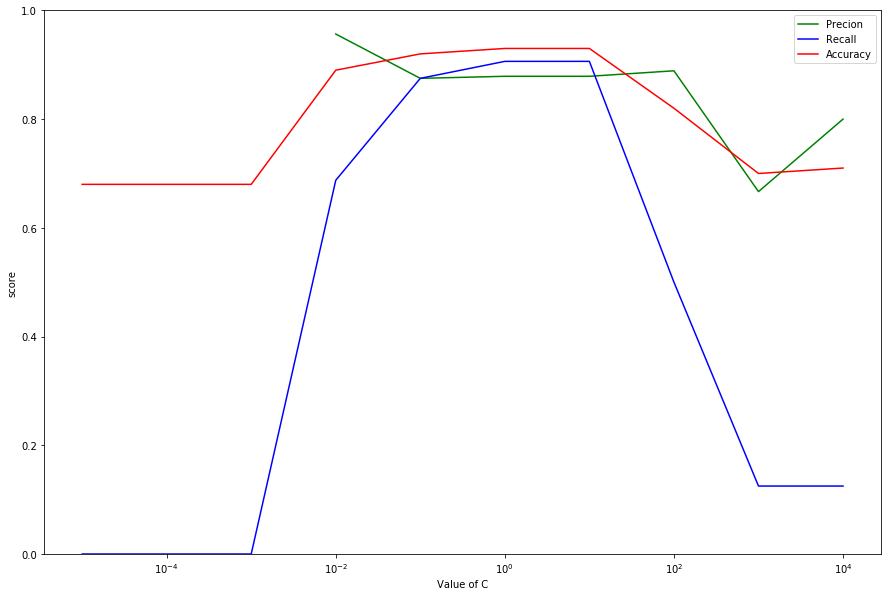

In [47]:
figure=plt.figure(figsize=(15,10))

gamma_val =[0.00001*10**i for i in range(10)]
prec=[]
rca=[]
acc=[]

for g_n in gamma_val:
    classifier= SVC(gamma=g_n, kernel='rbf')
    classifier.fit(X_train, y_train)
    y_pred= y_pred = classifier.predict(X_test)
    cm_=confusion_matrix(y_test, y_pred)
    pr_= cm_[1,1]/(cm_[1,1]+cm_[0,1])
    rc_= cm_[1,1]/(cm_[1,1]+cm_[1,0])
    ac_= (cm_[0,0]+cm_[1,1])/cm_.sum()
    prec.append(pr_)
    rca.append(rc_)
    acc.append(ac_)

    
plt.plot(C_val,prec,'green')
plt.plot(C_val,rca,'blue')
plt.plot(C_val,acc,'red')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylim(bottom=0, top=1)
plt.ylabel('score')
plt.legend(['Precion','Recall','Accuracy'])